# **Part-of-Speech Tagging using RNN Architectures**

## Abstract

This notebook explores the natural language processing task of sequence labelling. Particularlly, it examines the English parts-of-speech and the task of parts-of-speech tagging using recurrent neural network architectures.  

## Table of Contents

>[Part-of-Speech Tagging using RNN Architectures](#scrollTo=GVKT30Z-K068)

>>[Abstract](#scrollTo=xGH77FkpLEiN)

>>[Table of Contents](#scrollTo=6Zi9XAJELGvO)

>>[Sequence Labelling](#scrollTo=fqkl0cSKLoZt)

>>[Parts-of-Speech](#scrollTo=8j7FdwDcOfyM)

>>[Part-of-Speech Tagging](#scrollTo=zh06UWc9LKhn)

>>[Part-of-Speech Tagsets](#scrollTo=mrsijgyVjDgm)

>>>[English Penn Treebank Tagset](#scrollTo=85LV21Uyi70U)

>>>[The Universal Dependencies Project Tagset](#scrollTo=6CJhyVCXUgS0)

>>[Implementation of a POS Tagger](#scrollTo=2g1spczZf5og)

>>>[Imports](#scrollTo=iX1smNjAGT6E)

>>>[Download and Extract the Dataset](#scrollTo=pTEt2lf7t9wn)

>>>[Load the Dataset into a Pandas DataFrame](#scrollTo=HFbwJ0rHuEI5)

>>>[Explore the DataFrame](#scrollTo=ZaQ6CTE6UTyL)

>>>>[Examine POS Tags Distribution](#scrollTo=v2iPIwge4VD5)

>>>>[Examine Sentences Lengths](#scrollTo=4SuHhHQJ4RVM)

>>>[Vectorization](#scrollTo=yRb-Qdpck9Oe)

>>>>[Vectorization Hyperparameters](#scrollTo=Xxl1HMGG5wtC)

>>>>[Generate Tokens Vectorization Layer](#scrollTo=qNgkhaPc1W4j)

>>>>[Generate Tags Vectorization Layer](#scrollTo=_ob4OLG11aMM)

>>>>[Generate Vectorized Datasets](#scrollTo=nrMT3VJGGaYY)

>>>[Embedding](#scrollTo=z9JGfE8CCNlO)

>>>>[Embedding Hyperparameters](#scrollTo=RlHiaVI27fP8)

>>>>[Download Pre-trained GloVe Embeddings](#scrollTo=J-6qSyY-39Qh)

>>>>[Generate Embedding Matrix](#scrollTo=8KDx48Jo3qhn)

>>>[Models Creation](#scrollTo=Nl_6z6HYOjqT)

>>>>[SimpleRNN Model](#scrollTo=G0vmltVcx35x)

>>>>[Bidirectional LSTM Model](#scrollTo=RBCQSa2Kx6h3)

>>>>[Bidirectional Stacked LSTM Model](#scrollTo=JHxwu-UMx9WO)

>>>[Models Training](#scrollTo=e8WwIq4YTC1T)

>>>>[Training Hyperparameters](#scrollTo=5291j2sG_Enl)

>>>[Final Model](#scrollTo=7wNHmczab1-E)

>>>[Inference Pipeline](#scrollTo=ZcphzUSjystx)



## Sequence Labelling

Sequence labeling is a Natural Language Processing task. It consists of assigning each token (word) $x_i$ in an input sequence $X$ to a label $y_i$, so that the output sequence $Y$ has the same length as the input sequence $X$.

## Parts-of-Speech

There are eight parts of speech in the English language: 
- **Noun**
- **Pronoun**
- **Verb** 
- **Adjective**
- **Adverb**
- **Preposition**
- **Conjunction**
- **Interjection** 

The part of speech indicates how the word functions in meaning (semantically) as well as grammatically within the sentence (syntactically). An individual word can function as more than one part of speech when used in different circumstances. Understanding parts of speech is essential for determining the correct meaning of a word.



## Part-of-Speech Tagging

Part-of-speech tagging is a common example of sequence labelling. is the process of assigning a part-of-speech to each word in a text. The input  is a sequence $x_1, x_2, ..., x_n$ of tokenized words, and a tagset, and
the output is a sequence $y_1, y_2, ..., y_n$ of tags $y_i$ corresponding exactly to one input $x_i$ as shown in the figure below.

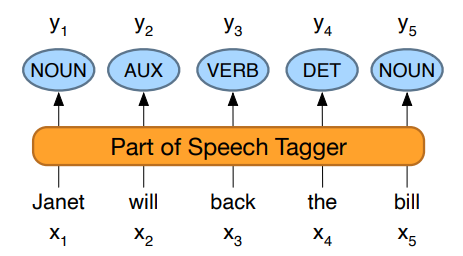

## Part-of-Speech Tagsets

However, features can be added to make finer-grained distinctions between the parts of speech. This is useful for performing sound comparative multilingual evaluations. A tagset is a list of part-of-speech tags (POS tags for short), i.e. labels used to indicate the part of speech and sometimes also other grammatical categories (case, tense etc.) of each token in a text corpus.

### English Penn Treebank Tagset

The Penn treebank POS tag set has 36 POS tags plus 12 others for punctuations
and special symbols. They're reported in the following table:

| Part-of-Speech | Tag | Part-of-Speech | Tag
| -- | -- | -- | -- |
| Coordinating Conjunction | CC | Verb Be, Base Form | VB |
| Cardinal Number | CD | Verb Be, Past Tense | VBD |
| Determiner | DT | Verb Be, Gerund | VBG |
| Existential "There" | EX | Verb Be, Past Participle | VBN |
| Foreign Word | FW | Verb Be, Non-3rd Person Singular, Present | VBP |
| Preposition/Subordinating Conjunction | IN | Verb Be, 3rd Person Singular, Present | VBZ |
| Subordinator "That" | IN/That | Verb Have, Base Form | VH |
| Adjective | JJ | Verb Have, Past Tense | VHD |
| Adjective, Comperative | JJR | Verb Have, Gerund | VHG |
| Adjective, Superlative | JJS | Verb Have, Past Participle | VHN |
| List Marker | LS | Verb Have, Non-3rd Person Singular, Present | VHP |
| Modal | MD | Verb Have, 3rd Person Singular, Present | VHZ |
| Noun, Singular or Mass | NN | Verb, Base Form | VV |
| Noun, Plural | NNS | Verb, Past Tense | VVD |
| Proper Noun, Singluar | NP | Verb, Gerund | VVG |
| Proper Noun, Plural | NPS | Verb, Non-3rd Person Singular, Present | VVP |
| Predeterminer | PDT | Verb, 3rd Person Singular, Present | VVZ |
| Possessive Ending | POS | WH-Determiner | WDT |
| Possessive Pronoun | PPZ | WH-Pronoun | WP |
| Adverb | RB | Possessive WH-Pronoun | WP\$ |
| Adverb, Comparative | RBR | WH-Adverb | WRB |
| Adverb, Superlative | RBS | # | # |
| Particle | RP | \$ | \$ |
| Sentence-break Punctuation | SENT | Quotation Marks | " |
| Symbol | SYM | Opening/Closing Brackets | (/) |
| Infinitive "To" | TO | Comma | , |
| Interjection | UH | Punctuation | : |



### The Universal Dependencies Project Tagset

The **Universal Dependencies** project (UD) is an effort to create syntactically-annotated corpora across many languages, using a single annotation standard [(Nivre et al., 2016)](https://aclanthology.org/L16-1262/). As part of this effort, they have designed the following part-of-speech tagset, which is meant to capture word classes across as many languages as possible:

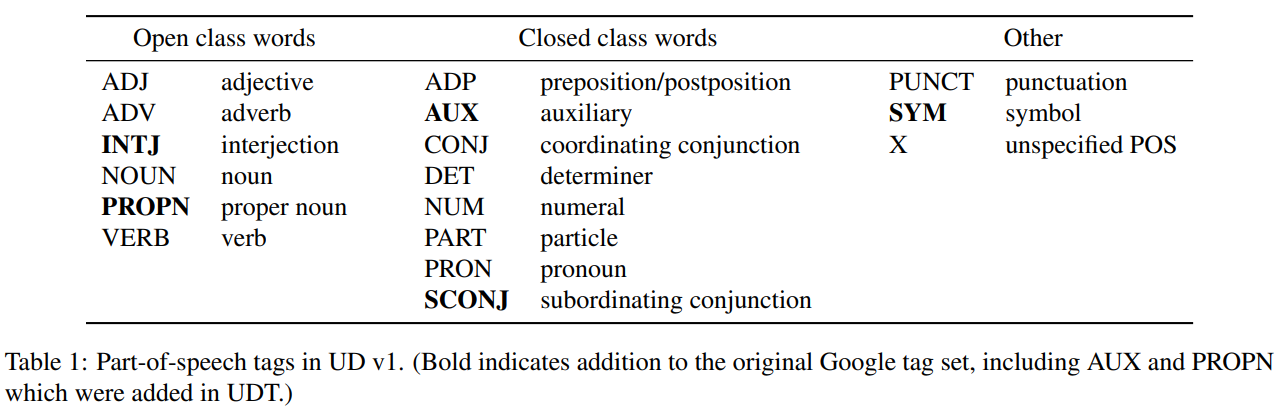

Parts of speech fall into two broad categories: closed class and open class. Closed classes are those with relatively fixed membership, such as prepositions - new prepositions are rarely coined. By contrast, nouns and verbs are open classes - new nouns and verbs like *iPhone* or *to fax* are continually being created or borrowed.

There are a total of 17 POS tags in the UD tagset:

| Part-of-Speech | Tag | Description | Example |
| -- | -- | -- | -- |
| Adjective | ADJ | Adjectives usually describe nounrs. | white, young, good |
| Adverb | ADV | Adverbs usually describe verbs. | very, extremely, slowly |
| Interjection | INTJ | Interjections include greetings and question responses. | oh, hey, uh, goodbye |
| Noun | NOUN | Nouns generally refer to people, places, things, or concepts. |cat, algorithm, beauty |
| Proper Noun | PROPN | Proper nouns are names of specific entities. | Apple, Regina, Alaska | 
| Verb | VERB | Verbs refer to actions and processes. | eat, eats, eating, ate, eaten |
| Preposition | ADP | English adpositions occur before nouns, hence are called prepositions. | on, before, by |
| Auxilary | AUX | Auxiliary verbs mark semantic features of a main verb. | be, do, have, modal verbs |
| Coordinating Conjunction | CONJ | Coordinating conjunctions join two elements of equal status. | and, or, but |
| Determiner | DT | Determiners provide additional information about the nouns or noun phrases that they modify. | the, an, all |
| Numeral | NUM | Numerals are an infinite but closed class, which includes numbers, regardless of whether spelled out or written in numerical form. | |
| Particle | PART | A particle is used in combination with a verb, producing a single unit is called a phrasal verb. | go on, rule out, turn down |
| Pronouns | PRON | Pronouns act as a shorthand for referring to an entity or event. | Personal pronouns (they, them), possessive pronouns (my, your), wh-pronouns (what, whoever) |
| Subordinating Conjunction | SCONJ | Subordinating conjunctions are used when one of the elements has some embedded status. | I thought *that* you might like some milk |
| Punctuation | PUNCT | | |
| Symbol | SYM | | |
| Unspecified POS | X | | |

## Implementation of a POS Tagger



### Imports

In [1]:
import os
import re

from zipfile import ZipFile
from collections import Counter
from urllib.request import urlretrieve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gensim.downloader as gloader

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import keras
from keras import Model
from keras.layers import TextVectorization, CategoryEncoding
from keras.layers import Input, Embedding, SimpleRNN, TimeDistributed, Dense
from keras.layers import Bidirectional, LSTM

### Download and Extract the Dataset

First, the [dependency_treebank](https://www.nltk.org/nltk_data/) dataset is downloaded from `NLTK`'s data module as a *`.zip`* file. The file is then extracted into the `data/` directory. The structure of the dataset directory is shown below:

```
data/
├── dependency_treebank/
      ├── wsj_0001.dp
      ├── wsj_0002.dp
      ├── ...
      ├── wsj_0199.dp
```

As shown above, the dataset is composed of 199 documents. Each document consists of several sentences, each of which is divided into triplets that follow the format: `word` `\t` `token` `\t` `int` `\n`. 

The numeric values in the third column are ignored and the column is dropped accordingly when loading the dataset into a Pandas DataFrame. Additionally, the train-val-test split are as follows:

*   `train`: `wsj_0001.dp` to `wsj_0100.dp` (100 documents/50%)
*   `test`:  `wsj_0151.dp` to `wsj_0199.dp` (49 documents/25%)
*   `val`:   `wsj_0101.dp` to `wsj_0150.dp` (50 documents/25%)

Since each document contains a variable number of sentences, this split isn't a clear indicator of the true data percentage of each split. This is issue is ameliorated later in the notebook.

In [4]:
# Specify the URL to download the annotated dataset
dataset_url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"

# Specify the working and dataset directories' paths
working_directory = os.getcwd()
dataset_directory = os.path.join(working_directory, "data")

# Download the dataset as a .zip file
zipfile_path = f"{working_directory}/dependency_treebank.zip"
if not os.path.exists(zipfile_path):
  print("Downloading the datatset...")
  urlretrieve(dataset_url, zipfile_path)

# Extract the dataset in /data/dependency_treebank
if not os.path.exists(dataset_directory):
  print("Extracting the dataset...")
  with ZipFile(zipfile_path) as zip_file:
    zip_file.extractall(dataset_directory)

# Update the dataset directory to /data/dependency_treebank
dataset_directory = os.path.join(dataset_directory, "dependency_treebank")
print("Dataset is ready.")

Dataset is ready.


### Load the Dataset into a Pandas DataFrame

Before encoding the dataset as a Pandas DataFrame, the following preprocessing steps are taken:

*   As mentioned above, the third column is dropped.
*   All words are lowercased.
  - This step is crucial to find the correspondent tokens in the pre-trained embedding model's vocabulary. 
*   The documents are split into sentences. This means that each row in the output DataFrame corresponds to a sentence.


**Resulting DataFrame**

| document_num | sentence_num | split |tokens | tags |
| --- | --- | --- | --- | --- |
| --- | --- | --- | --- | --- |


*   `document_num` *(int)* is the document's identifier of the sentence.
*   `sentence_num` *(int)* is the sentence's identifer in the document.
*   `split` *(string)* whether the sentence belongs to `train`, `val`, or `test` set.
*   `tokens` *(list)* of the sentence's tokens.
*   `tags` *(list)* of the corresponding tags.




In [5]:
# List and sort all document names in the dataset
document_names = sorted(os.listdir(dataset_directory))

# df_rows will be populated with dictionaries corresponding to sentences
df_rows = []
for document_name in document_names:
  with open(f"{dataset_directory}/{document_name}") as current_document:

    # Load the current document file as a pandas dataframe
    df = pd.read_csv(current_document, sep="\t", header=None, names=["tokens", "tags", "to_drop"], skip_blank_lines=False)
    
    # Drop the 3rd numeric column
    df = df.drop("to_drop", axis=1)

    # Add a "sentence_num" column to group tokens by sentence
    df["sentence_num"] = df.isnull().all(axis=1).cumsum()
    df = df.dropna()
    df = df.reset_index(drop=True)

    # Apply .lower() to tokens
    df["tokens"] = df["tokens"].str.lower()

    # Update the rows dataframe
    document_num = int(re.search("[0-9]+", document_name).group())
    if document_num <= 100:
      split = "train"
    elif 101 <= document_num <= 150:
      split = "val"
    else:
      split = "test"

    # Generate a row dictionary and append it to df_rows
    for sentence_num in df["sentence_num"].unique():
      df_rows.append(
        {
          "document_num": document_num,
          "sentence_num": sentence_num,
          "split": split,
          "tokens": list(df[df["sentence_num"] == sentence_num]["tokens"]),
          "tags": list(df[df["sentence_num"] == sentence_num]["tags"]),
        }
    )

corpus_df = pd.DataFrame(df_rows)

### Explore the DataFrame

In [6]:
corpus_df

,document_num,sentence_num,split,tokens,tags
0,1,0,train,"[pierre, vinken, ,, 61, years, old, ,, will, j...","[NNP, NNP, ,, CD, NNS, JJ, ,, MD, VB, DT, NN, ..."
1,1,1,train,"[mr., vinken, is, chairman, of, elsevier, n.v....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, ,, DT, NNP, ..."
2,2,0,train,"[rudolph, agnew, ,, 55, years, old, and, forme...","[NNP, NNP, ,, CD, NNS, JJ, CC, JJ, NN, IN, NNP..."
3,3,0,train,"[a, form, of, asbestos, once, used, to, make, ...","[DT, NN, IN, NN, RB, VBN, TO, VB, NNP, NN, NNS..."
4,3,1,train,"[the, asbestos, fiber, ,, crocidolite, ,, is, ...","[DT, NN, NN, ,, NN, ,, VBZ, RB, JJ, IN, PRP, V..."
...,...,...,...,...,...
3909,198,9,test,"[they, also, said, that, more, than, a, dozen,...","[PRP, RB, VBD, IN, JJR, IN, DT, NN, NNS, VBP, ..."
3910,198,10,test,"[sen., kennedy, said, in, a, separate, stateme...","[NNP, NNP, VBD, IN, DT, JJ, NN, IN, PRP, VBZ, ..."
3911,199,0,test,"[trinity, industries, inc., said, it, reached,...","[NNP, NNPS, NNP, VBD, PRP, VBD, DT, JJ, NN, TO..."
3912,199,1,test,"[terms, were, n't, disclosed, .]","[NNS, VBD, RB, VBN, .]"


The following section examines the true data percentage per split:

In [7]:
print("Percentages of sentences per split:\n" + 40 * "-")
sentence_percentages = corpus_df["split"].value_counts() / corpus_df.shape[0] * 100
sentence_percentages = sentence_percentages.tolist()
for split, percentage in zip(corpus_df["split"].unique(), sentence_percentages):
  print(f"Percentage of {split} split: {round(percentage, 2)}%")

Percentages of sentences per split:
----------------------------------------
Percentage of train split: 50.15%
Percentage of val split: 33.19%
Percentage of test split: 16.66%


#### Examine POS Tags Distribution

In [8]:
def series_frequency(series):
  series_counter = Counter()

  for series_list in series:
    series_counter.update(series_list)

  return series_counter.most_common()

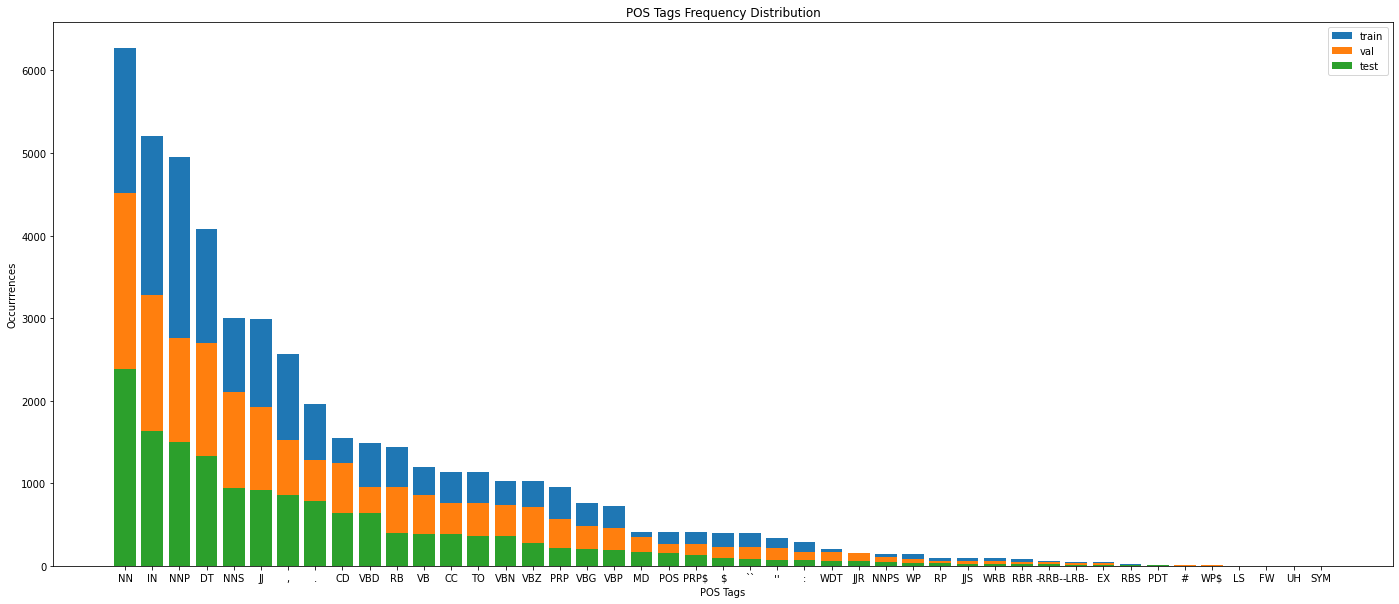

In [9]:
# Plot the tags frequency distribution per split set
fig, ax = plt.subplots(figsize=(24, 10))

# Obtain the tags frequency distribution per split set
splits_tags_freq = []

corpus_tags = np.array(series_frequency(corpus_df["tags"]))[:, 0]
for split in ["train", "val", "test"]:
  split_tags_freq = np.array(series_frequency(corpus_df[corpus_df["split"] == split]["tags"]))[:, 1].astype(int)
  split_tags_freq = np.pad(split_tags_freq, pad_width=(0, len(corpus_tags) - len(split_tags_freq)), mode="constant")
  splits_tags_freq.append(split_tags_freq)

  ax.bar(corpus_tags, split_tags_freq, label=split)

ax.set_ylabel("Occurrrences")
ax.set_xlabel("POS Tags")
ax.set_title("POS Tags Frequency Distribution")
ax.legend()
plt.show() 

#### Examine Sentences Lengths

Examining the length of all the sentences in the dataset is important to decide the maximum sequence length `MAX_SEQ_LEN` hyperparameter.

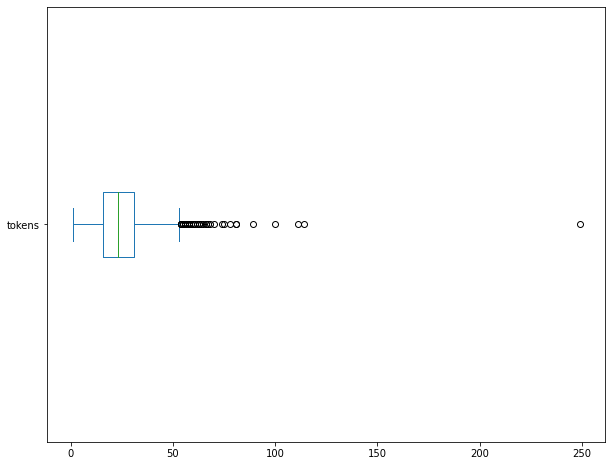

In [10]:
# Visualize the sentences lengths
sentences_len = corpus_df["tokens"].apply(len)
sentences_len.plot.box(figsize=(10, 8), vert=False)

In [11]:
print(f"Total number of sentences in the dataset: {len(corpus_df)}")
print(f"Number of sentences with length > 50: {(sentences_len > 50).sum()}")
print(f"Number of sentences with length > 64: {(sentences_len > 64).sum()}")
print(f"Number of sentences with length > 128: {(sentences_len > 128).sum()}")

Total number of sentences in the dataset: 3914
Number of sentences with length > 50: 70
Number of sentences with length > 64: 16
Number of sentences with length > 128: 1


In [12]:
unique_tags = corpus_df["tags"].explode().unique()
unique_words = corpus_df["tokens"].explode().unique()

num_sentences = len(corpus_df)
num_unique_tags = len(unique_tags)
num_unique_words = len(unique_words)

print(f"Number of sentences in the dataset: {num_sentences}")
print(f"Number of unique words in the dataset: {num_unique_words}")
print(f"Number of POS tags in the dataset: {num_unique_tags}")
print(f"POS tags in the dataset: {corpus_tags}")

Number of sentences in the dataset: 3914
Number of unique words in the dataset: 10947
Number of POS tags in the dataset: 45
POS tags in the dataset: ['NN' 'IN' 'NNP' 'DT' 'NNS' 'JJ' ',' '.' 'CD' 'VBD' 'RB' 'VB' 'CC' 'TO'
 'VBN' 'VBZ' 'PRP' 'VBG' 'VBP' 'MD' 'POS' 'PRP$' '$' '``' "''" ':' 'WDT'
 'JJR' 'NNPS' 'WP' 'RP' 'JJS' 'WRB' 'RBR' '-RRB-' '-LRB-' 'EX' 'RBS' 'PDT'
 '#' 'WP$' 'LS' 'FW' 'UH' 'SYM']


### Vectorization

This section instanciates two of Keras's [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) preprocessing layer to map the tokens and tags into integer sequences. It learns two sets of vocabularies (one for the tokens and another for the tags) through the `.adapt()` method. 

When the layers are adapted, they will analyze the dataset, determine the frequency of individual string values, and create vocabularies from them. The tokens vocabulary size is capped at `MAX_TOKENS` with the most frequent tokens used to create it. While the tags vocabulary isn't capped as there's already a limited number of unique tags. Each vocabulary contains two extra entries for the padding token `""` and the OOV one `[UNK]`. Finally, the layer outputs vectors of fixed length by padding or truncating them to `MAX_SEQ_LEN`. This results in an output of shape `(batch_size, MAX_SEQ_LEN)`.

After vectorization, the tags vectors are one-hot encoded to be used in training with the categorical crossentropy loss.

In [47]:
# Split the dataframe
train_val_df = corpus_df[corpus_df["split"] != "test"]
train_df = corpus_df[corpus_df["split"] == "train"]
val_df = corpus_df[corpus_df["split"] == "val"]
test_df = corpus_df[corpus_df["split"] == "test"]

train_val_df.sample(frac=1).reset_index(drop=True, inplace=True)
train_df.sample(frac=1).reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

#### Vectorization Hyperparameters

In [14]:
MAX_TOKENS = num_unique_words + 2
MAX_SEQ_LEN = 64

In [15]:
def tokens_to_ids(vectorizer, tokens):
  return vectorizer(tokens).numpy()

def ids_to_tokens(vectorizer, ids):
  vocab = vectorizer.get_vocabulary()
  return " ".join([vocab[id] for id in ids])

#### Generate Tokens Vectorization Layer

In [16]:
# Instanciate a tokens vectorization layer
tokens_vectorization_layer = TextVectorization(
    max_tokens=MAX_TOKENS,
    standardize=None,
    split=None,
    output_sequence_length=MAX_SEQ_LEN,
)

# Generate the layer's vocabulary
tokens_vectorization_layer.adapt(train_df["tokens"].explode())

# Get layer's vocabulary and its size
tokens_vocabulary = tokens_vectorization_layer.get_vocabulary()
tokens_vocabulary_size = tokens_vectorization_layer.vocabulary_size()

In [17]:
print(f"Generated Tokens Vocabulary Size: {tokens_vocabulary_size}")
print(40 * "-")
print(tokens_vocabulary[:20])

Generated Tokens Vocabulary Size: 7406
----------------------------------------
['', '[UNK]', ',', 'the', '.', 'of', 'to', 'a', 'in', 'and', 'for', "'s", 'that', '``', "''", '$', 'is', 'said', 'it', 'on']


In [18]:
example_sentence = train_df["tokens"][0]
example_vectorized_ids = tokens_to_ids(tokens_vectorization_layer, example_sentence)
example_decoded_tokens = ids_to_tokens(tokens_vectorization_layer, example_vectorized_ids)

print("Example Sentence:-")
print(example_sentence)

print("\nTokenized Sentence:-")
print(example_vectorized_ids)

print("\nDe-tokenized Sentence:-")
print(example_decoded_tokens)

Example Sentence:-
['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.']

Tokenized Sentence:-
[4712 2350    2 2289   65  356    2   41 1585    3  200   24    7 1209
  277  755 3396    4    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]

De-tokenized Sentence:-
pierre vinken , 61 years old , will join the board as a nonexecutive director nov. 29 .                                              


#### Generate Tags Vectorization Layer

In [19]:
# Instanciate a tokens vectorization layer
tags_vectorization_layer = TextVectorization(
    max_tokens=None,
    standardize=None,
    split=None,
    output_sequence_length=MAX_SEQ_LEN,
    vocabulary=corpus_tags
)

# Get layer's vocabulary and its size
tags_vocabulary = tags_vectorization_layer.get_vocabulary()
tags_vocabulary_size = tags_vectorization_layer.vocabulary_size()

In [20]:
print(f"Generated Tags Vocabulary Size: {tags_vocabulary_size}")
print(40 * "-")
print(tags_vocabulary[:20])

Generated Tags Vocabulary Size: 47
----------------------------------------
['', '[UNK]', 'NN', 'IN', 'NNP', 'DT', 'NNS', 'JJ', ',', '.', 'CD', 'VBD', 'RB', 'VB', 'CC', 'TO', 'VBN', 'VBZ', 'PRP', 'VBG']


In [21]:
example_sentence = train_df["tags"][0]
example_vectorized_ids = tokens_to_ids(tags_vectorization_layer, example_sentence)
example_decoded_tokens = ids_to_tokens(tags_vectorization_layer, example_vectorized_ids)

print("Example Sentence:-")
print(example_sentence)

print("\nTokenized Sentence:-")
print(example_vectorized_ids)

print("\nDe-tokenized Sentence:-")
print(example_decoded_tokens)

Example Sentence:-
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']

Tokenized Sentence:-
[ 4  4  8 10  6  7  8 21 13  5  2  3  5  7  2  4 10  9  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

De-tokenized Sentence:-
NNP NNP , CD NNS JJ , MD VB DT NN IN DT JJ NN NNP CD .                                              


#### Generate Vectorized Datasets

In [22]:
train_val_vectorized_tokens = tokens_vectorization_layer(tf.ragged.constant(train_val_df["tokens"]))
train_vectorized_tokens = tokens_vectorization_layer(tf.ragged.constant(train_df["tokens"]))
val_vectorized_tokens = tokens_vectorization_layer(tf.ragged.constant(val_df["tokens"]))
test_vectorized_tokens = tokens_vectorization_layer(tf.ragged.constant(test_df["tokens"]))

train_val_one_hot_encoded_tags = to_categorical(tags_vectorization_layer(tf.ragged.constant(train_val_df["tags"])))
train_one_hot_encoded_tags = to_categorical(tags_vectorization_layer(tf.ragged.constant(train_df["tags"])))
val_one_hot_encoded_tags = to_categorical(tags_vectorization_layer(tf.ragged.constant(val_df["tags"])))
test_one_hot_encoded_tags = to_categorical(tags_vectorization_layer(tf.ragged.constant(test_df["tags"])))

print(f"Vectorized Tokens Shape - Training and Validation: {train_val_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Training: {train_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Validation: {val_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Testing: {test_vectorized_tokens.shape}")

print(f"One-hot Encoded Tags Shape - Training and Validation: {train_val_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Training: {train_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Validation: {val_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Testing: {test_one_hot_encoded_tags.shape}")

Vectorized Tokens Shape - Training and Validation: (3262, 64)
Vectorized Tokens Shape - Training: (1963, 64)
Vectorized Tokens Shape - Validation: (1299, 64)
Vectorized Tokens Shape - Testing: (652, 64)
One-hot Encoded Tags Shape - Training and Validation: (3262, 64, 47)
One-hot Encoded Tags Shape - Training: (1963, 64, 47)
One-hot Encoded Tags Shape - Validation: (1299, 64, 46)
One-hot Encoded Tags Shape - Testing: (652, 64, 43)


In [23]:
val_padding = (
    (0, 0),
    (0, 0),
    (0, len(corpus_tags) + 2 - val_one_hot_encoded_tags.shape[2])
)

test_padding = (
    (0, 0),
    (0, 0),
    (0, len(corpus_tags) + 2 - test_one_hot_encoded_tags.shape[2])  
)

val_one_hot_encoded_tags = np.pad(val_one_hot_encoded_tags, pad_width=val_padding, mode="constant")
test_one_hot_encoded_tags = np.pad(test_one_hot_encoded_tags, pad_width=test_padding, mode="constant")

print(f"Vectorized Tokens Shape - Training and Validation: {train_val_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Training: {train_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Validation: {val_vectorized_tokens.shape}")
print(f"Vectorized Tokens Shape - Testing: {test_vectorized_tokens.shape}")

print(f"One-hot Encoded Tags Shape - Training and Validation: {train_val_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Training: {train_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Validation: {val_one_hot_encoded_tags.shape}")
print(f"One-hot Encoded Tags Shape - Testing: {test_one_hot_encoded_tags.shape}")

Vectorized Tokens Shape - Training and Validation: (3262, 64)
Vectorized Tokens Shape - Training: (1963, 64)
Vectorized Tokens Shape - Validation: (1299, 64)
Vectorized Tokens Shape - Testing: (652, 64)
One-hot Encoded Tags Shape - Training and Validation: (3262, 64, 47)
One-hot Encoded Tags Shape - Training: (1963, 64, 47)
One-hot Encoded Tags Shape - Validation: (1299, 64, 47)
One-hot Encoded Tags Shape - Testing: (652, 64, 47)


### Embedding

This sections downloads a pre-trained GloVe word embeddings model, and uses it to create an embedding matrix. The embedding matrix is then used by the RNN model to map the integer sequences received from the vectorization layer into word embeddings of dimensionality equal to `EMBEDDING_DIM`. 

Words in the dataset that are not found in the GloVe embeddings model are given a null vector. This includes the padding token `""` as well as the OOV one `[UNK]`.

#### Embedding Hyperparameters

In [24]:
EMBEDDING_DIM = 100

#### Download Pre-trained GloVe Embeddings

In [25]:
glove_embeddings_download_path = f"glove-wiki-gigaword-{EMBEDDING_DIM}"
glove_embeddings = gloader.load(glove_embeddings_download_path)

#### Generate Embedding Matrix

In [26]:
word_index = dict(zip(tokens_vocabulary, range(tokens_vocabulary_size)))

hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((tokens_vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():

    try:
      embedding_vector = glove_embeddings[word]
      embedding_matrix[i] = embedding_vector
      hits += 1

    # Words not found in embedding index will be all-zeros.
    # This includes the representation for "padding" and "OOV"
    except KeyError:
      misses += 1

print(f"Number of Tokens in Vocabulary: {tokens_vocabulary_size}")
print(f"Number of Hits (Tokens Found in the GloVe Model): {hits}")
print(f"Number of Misses (Tokens Not Found in the GloVe Model): {misses}")

Number of Tokens in Vocabulary: 7406
Number of Hits (Tokens Found in the GloVe Model): 7045
Number of Misses (Tokens Not Found in the GloVe Model): 361


### Models Creation

#### SimpleRNN Model

In [27]:
# Inputs Layer
inputs = Input(shape=(MAX_SEQ_LEN), name="input_layer")

# Embedding Layer
embedding_layer = Embedding(
    input_dim=tokens_vocabulary_size,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_SEQ_LEN,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
    name="embedding_layer"
)(inputs)

# SimpleRNN Layer
RNN_layer = SimpleRNN(units=EMBEDDING_DIM, return_sequences=True, name="RNN_layer")(embedding_layer)

# Outputs Layer
outputs = TimeDistributed(Dense(units=tags_vocabulary_size, activation="softmax"), name="output_layer")(RNN_layer)

# Model Instanciation
rnn_model = Model(inputs, outputs, name="Simple_RNN_Model")
rnn_model.summary()

Model: "Simple_RNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64)]              0         
                                                                 
 embedding_layer (Embedding)  (None, 64, 100)          740600    
                                                                 
 RNN_layer (SimpleRNN)       (None, 64, 100)           20100     
                                                                 
 output_layer (TimeDistribut  (None, 64, 47)           4747      
 ed)                                                             
                                                                 
Total params: 765,447
Trainable params: 24,847
Non-trainable params: 740,600
_________________________________________________________________


#### Bidirectional LSTM Model

In [28]:
def bi_lstm(trainable_glove_embeddings=False):
  # Inputs Layer
  inputs = Input(shape=(MAX_SEQ_LEN), name="input_layer")

  # Embedding Layer
  embedding_layer = Embedding(
  input_dim=tokens_vocabulary_size,
  output_dim=EMBEDDING_DIM,
  input_length=MAX_SEQ_LEN,
  embeddings_initializer=keras.initializers.Constant(embedding_matrix),
  trainable=True if trainable_glove_embeddings else False,
  name="embedding_layer"
  )(inputs)

  # Bidirectional LSTM Layer
  LSTM_layer = Bidirectional(LSTM(units=EMBEDDING_DIM, return_sequences=True, name="bidirectional_lstm_layer"))(embedding_layer)

  # Outputs Layer
  outputs = TimeDistributed(Dense(units=tags_vocabulary_size, activation="softmax"), name="output_layer")(LSTM_layer)

  # Model Instanciation
  bidirectional_lstm_model = Model(inputs, outputs, name="Bidirectional_LSTM_Model")
  return bidirectional_lstm_model

In [29]:
bi_lstm_model = bi_lstm()
bi_lstm_model.summary()

bi_lstm_with_trainable_embeddings_model = bi_lstm(trainable_glove_embeddings=True)
bi_lstm_with_trainable_embeddings_model.summary()

Model: "Bidirectional_LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64)]              0         
                                                                 
 embedding_layer (Embedding)  (None, 64, 100)          740600    
                                                                 
 bidirectional (Bidirectiona  (None, 64, 200)          160800    
 l)                                                              
                                                                 
 output_layer (TimeDistribut  (None, 64, 47)           9447      
 ed)                                                             
                                                                 
Total params: 910,847
Trainable params: 170,247
Non-trainable params: 740,600
_________________________________________________________________
Model: "Bidirectional_LSTM_Mod

#### Bidirectional Stacked LSTM Model

In [30]:
def bi_stacked_lstm(trainable_glove_embeddings=False):
  # Inputs Layer
  inputs = Input(shape=(MAX_SEQ_LEN), name="input_layer")

  # Embedding Layer
  embedding_layer = Embedding(
      input_dim=tokens_vocabulary_size,
      output_dim=EMBEDDING_DIM,
      input_length=MAX_SEQ_LEN,
      embeddings_initializer=keras.initializers.Constant(embedding_matrix),
      trainable=True if trainable_glove_embeddings else False,
      name="embedding_layer"
  )(inputs)

  # Bidirectional LSTM Layer
  LSTM_layer = Bidirectional(LSTM(units=EMBEDDING_DIM, return_sequences=True, name="bidirectional_lstm_layer"))(embedding_layer)
  LSTM_layer = Bidirectional(LSTM(units=EMBEDDING_DIM, return_sequences=True, name="bidirectional_lstm_layer"))(LSTM_layer)

  # Outputs Layer
  outputs = TimeDistributed(Dense(units=tags_vocabulary_size, activation="softmax"), name="output_layer")(LSTM_layer)

  # Model Instanciation
  bidirectional_stacked_lstm_model = Model(inputs, outputs, name="Bidirectional_LSTM_Model")
  return bidirectional_stacked_lstm_model

In [31]:
bi_stacked_lstm_model = bi_stacked_lstm()
bi_stacked_lstm_model.summary()

bi_stacked_lstm_with_trainable_embeddings_model = bi_stacked_lstm(trainable_glove_embeddings=True)
bi_stacked_lstm_with_trainable_embeddings_model.summary()

Model: "Bidirectional_LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 64)]              0         
                                                                 
 embedding_layer (Embedding)  (None, 64, 100)          740600    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64, 200)          160800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64, 200)          240800    
 nal)                                                            
                                                                 
 output_layer (TimeDistribut  (None, 64, 47)           9447      
 ed)                                                             
                                          

### Models Training

#### Training Hyperparameters

In [32]:
epochs = 8

In [33]:
rnn_model.compile("adam", "categorical_crossentropy", "accuracy")
rnn_model.fit(train_vectorized_tokens, train_one_hot_encoded_tags, epochs=epochs, validation_data=(val_vectorized_tokens, val_one_hot_encoded_tags))

Epoch 1/8
62/62 [==============================] - 5s 59ms/step - loss: 1.4382 - accuracy: 0.6859 - val_loss: 0.8748 - val_accuracy: 0.7811
Epoch 2/8
62/62 [==============================] - 3s 55ms/step - loss: 0.6941 - accuracy: 0.8279 - val_loss: 0.6140 - val_accuracy: 0.8441
Epoch 3/8
62/62 [==============================] - 3s 55ms/step - loss: 0.4902 - accuracy: 0.8805 - val_loss: 0.4809 - val_accuracy: 0.8776
Epoch 4/8
62/62 [==============================] - 3s 54ms/step - loss: 0.3816 - accuracy: 0.9065 - val_loss: 0.4080 - val_accuracy: 0.8955
Epoch 5/8
62/62 [==============================] - 3s 56ms/step - loss: 0.3179 - accuracy: 0.9208 - val_loss: 0.3618 - val_accuracy: 0.9059
Epoch 6/8
62/62 [==============================] - 3s 53ms/step - loss: 0.2768 - accuracy: 0.9300 - val_loss: 0.3315 - val_accuracy: 0.9123
Epoch 7/8
62/62 [==============================] - 3s 55ms/step - loss: 0.2480 - accuracy: 0.9360 - val_loss: 0.3108 - val_accuracy: 0.9165
Epoch 8/8
62/62 [===

In [34]:
bi_lstm_model.compile("adam", "categorical_crossentropy", "accuracy")
bi_lstm_model.fit(train_vectorized_tokens, train_one_hot_encoded_tags, epochs=epochs, validation_data=(val_vectorized_tokens, val_one_hot_encoded_tags))

Epoch 1/8
62/62 [==============================] - 5s 27ms/step - loss: 1.4656 - accuracy: 0.7289 - val_loss: 0.7882 - val_accuracy: 0.8126
Epoch 2/8
62/62 [==============================] - 1s 14ms/step - loss: 0.5864 - accuracy: 0.8561 - val_loss: 0.4879 - val_accuracy: 0.8762
Epoch 3/8
62/62 [==============================] - 1s 14ms/step - loss: 0.3734 - accuracy: 0.9097 - val_loss: 0.3687 - val_accuracy: 0.9017
Epoch 4/8
62/62 [==============================] - 1s 14ms/step - loss: 0.2798 - accuracy: 0.9302 - val_loss: 0.3096 - val_accuracy: 0.9157
Epoch 5/8
62/62 [==============================] - 1s 14ms/step - loss: 0.2296 - accuracy: 0.9420 - val_loss: 0.2720 - val_accuracy: 0.9257
Epoch 6/8
62/62 [==============================] - 1s 13ms/step - loss: 0.1977 - accuracy: 0.9491 - val_loss: 0.2443 - val_accuracy: 0.9329
Epoch 7/8
62/62 [==============================] - 1s 14ms/step - loss: 0.1757 - accuracy: 0.9542 - val_loss: 0.2273 - val_accuracy: 0.9362
Epoch 8/8
62/62 [===

In [35]:
bi_lstm_with_trainable_embeddings_model.compile("adam", "categorical_crossentropy", "accuracy")
bi_lstm_with_trainable_embeddings_model.fit(train_vectorized_tokens, train_one_hot_encoded_tags, epochs=epochs, validation_data=(val_vectorized_tokens, val_one_hot_encoded_tags))

Epoch 1/8
62/62 [==============================] - 6s 33ms/step - loss: 1.5013 - accuracy: 0.7300 - val_loss: 0.7918 - val_accuracy: 0.8121
Epoch 2/8
62/62 [==============================] - 1s 15ms/step - loss: 0.5584 - accuracy: 0.8685 - val_loss: 0.4323 - val_accuracy: 0.8987
Epoch 3/8
62/62 [==============================] - 1s 15ms/step - loss: 0.2972 - accuracy: 0.9365 - val_loss: 0.2846 - val_accuracy: 0.9300
Epoch 4/8
62/62 [==============================] - 1s 14ms/step - loss: 0.1837 - accuracy: 0.9589 - val_loss: 0.2187 - val_accuracy: 0.9416
Epoch 5/8
62/62 [==============================] - 1s 14ms/step - loss: 0.1282 - accuracy: 0.9697 - val_loss: 0.1862 - val_accuracy: 0.9480
Epoch 6/8
62/62 [==============================] - 1s 14ms/step - loss: 0.0970 - accuracy: 0.9766 - val_loss: 0.1700 - val_accuracy: 0.9518
Epoch 7/8
62/62 [==============================] - 1s 15ms/step - loss: 0.0772 - accuracy: 0.9814 - val_loss: 0.1579 - val_accuracy: 0.9546
Epoch 8/8
62/62 [===

In [36]:
bi_stacked_lstm_model.compile("adam", "categorical_crossentropy", "accuracy")
bi_stacked_lstm_model.fit(train_vectorized_tokens, train_one_hot_encoded_tags, epochs=epochs, validation_data=(val_vectorized_tokens, val_one_hot_encoded_tags))

Epoch 1/8
62/62 [==============================] - 9s 46ms/step - loss: 1.3778 - accuracy: 0.6815 - val_loss: 0.9789 - val_accuracy: 0.7343
Epoch 2/8
62/62 [==============================] - 2s 25ms/step - loss: 0.7534 - accuracy: 0.8014 - val_loss: 0.5675 - val_accuracy: 0.8424
Epoch 3/8
62/62 [==============================] - 1s 23ms/step - loss: 0.4199 - accuracy: 0.8895 - val_loss: 0.3825 - val_accuracy: 0.8960
Epoch 4/8
62/62 [==============================] - 1s 23ms/step - loss: 0.2835 - accuracy: 0.9261 - val_loss: 0.2998 - val_accuracy: 0.9192
Epoch 5/8
62/62 [==============================] - 1s 23ms/step - loss: 0.2216 - accuracy: 0.9416 - val_loss: 0.2641 - val_accuracy: 0.9262
Epoch 6/8
62/62 [==============================] - 1s 23ms/step - loss: 0.1855 - accuracy: 0.9504 - val_loss: 0.2353 - val_accuracy: 0.9341
Epoch 7/8
62/62 [==============================] - 1s 23ms/step - loss: 0.1642 - accuracy: 0.9555 - val_loss: 0.2240 - val_accuracy: 0.9368
Epoch 8/8
62/62 [===

In [37]:
bi_stacked_lstm_with_trainable_embeddings_model.compile("adam", "categorical_crossentropy", "accuracy")
bi_stacked_lstm_with_trainable_embeddings_model.fit(train_vectorized_tokens, train_one_hot_encoded_tags, epochs=epochs, validation_data=(val_vectorized_tokens, val_one_hot_encoded_tags))

Epoch 1/8
62/62 [==============================] - 9s 53ms/step - loss: 1.3429 - accuracy: 0.6858 - val_loss: 0.9475 - val_accuracy: 0.7448
Epoch 2/8
62/62 [==============================] - 1s 23ms/step - loss: 0.6792 - accuracy: 0.8270 - val_loss: 0.4955 - val_accuracy: 0.8670
Epoch 3/8
62/62 [==============================] - 1s 24ms/step - loss: 0.3302 - accuracy: 0.9202 - val_loss: 0.2899 - val_accuracy: 0.9272
Epoch 4/8
62/62 [==============================] - 1s 24ms/step - loss: 0.1828 - accuracy: 0.9574 - val_loss: 0.2143 - val_accuracy: 0.9415
Epoch 5/8
62/62 [==============================] - 1s 24ms/step - loss: 0.1196 - accuracy: 0.9716 - val_loss: 0.1812 - val_accuracy: 0.9494
Epoch 6/8
62/62 [==============================] - 1s 24ms/step - loss: 0.0876 - accuracy: 0.9791 - val_loss: 0.1691 - val_accuracy: 0.9527
Epoch 7/8
62/62 [==============================] - 1s 24ms/step - loss: 0.0682 - accuracy: 0.9837 - val_loss: 0.1631 - val_accuracy: 0.9548
Epoch 8/8
62/62 [===

### Final Model

In [38]:
model = bi_stacked_lstm(trainable_glove_embeddings=True)
model.compile("adam", "categorical_crossentropy", "accuracy")
model.fit(train_val_vectorized_tokens, train_val_one_hot_encoded_tags, epochs=epochs)

Epoch 1/8
102/102 [==============================] - 7s 19ms/step - loss: 1.1583 - accuracy: 0.7269
Epoch 2/8
102/102 [==============================] - 2s 18ms/step - loss: 0.3910 - accuracy: 0.8994
Epoch 3/8
102/102 [==============================] - 2s 18ms/step - loss: 0.1749 - accuracy: 0.9566
Epoch 4/8
102/102 [==============================] - 2s 19ms/step - loss: 0.1138 - accuracy: 0.9700
Epoch 5/8
102/102 [==============================] - 2s 18ms/step - loss: 0.0868 - accuracy: 0.9767
Epoch 6/8
102/102 [==============================] - 2s 18ms/step - loss: 0.0711 - accuracy: 0.9803
Epoch 7/8
102/102 [==============================] - 2s 18ms/step - loss: 0.0608 - accuracy: 0.9828
Epoch 8/8
102/102 [==============================] - 2s 18ms/step - loss: 0.0534 - accuracy: 0.9847


In [39]:
model.evaluate(test_vectorized_tokens, test_one_hot_encoded_tags)

21/21 [==============================] - 2s 9ms/step - loss: 0.0980 - accuracy: 0.9696


[0.09802854806184769, 0.9696366786956787]

### Inference Pipeline

In [98]:
def infer_pos(text):
  text = text.split(" ")
  tokenized_text = tokens_vectorization_layer(text).numpy().reshape(1, -1)
  y_pred = model.predict(tokenized_text)
  y_pred = np.argmax(y_pred, axis=2)[0]

  pos_tags = []
  for id in y_pred:
    pos_tags.append(tags_vocabulary[id])

  for token, tag in zip(text, pos_tags):
    print(f"{token}\t{tag}")

In [102]:
infer_pos("I went to the office")

1/1 [==============================] - 0s 26ms/step
I	NNP
went	VBD
to	TO
the	DT
office	NN
